<a href="https://colab.research.google.com/github/reginaldogalli/analiseDadosVacinacao/blob/main/VACINA_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# baixa baixa um arquivo csv da internet direto para a pasta no google drive
!wget -P '/content/drive/MyDrive/Colab Datasets/vacina_sp' https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-07-07/uf%3DSP/part-00000-f537b1aa-bf85-43a3-93e6-839ed89e4258.c000.csv

--2021-07-09 12:05:40--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-07-07/uf%3DSP/part-00000-f537b1aa-bf85-43a3-93e6-839ed89e4258.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.164.38
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.164.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12842708184 (12G) [text/csv]
Saving to: ‘/content/drive/MyDrive/Colab Datasets/vacina_sp/part-00000-f537b1aa-bf85-43a3-93e6-839ed89e4258.c000.csv’

part-00000-f537b1aa 100%[===================>]  11.96G  21.8MB/s    in 9m 43s  

2021-07-09 12:15:24 (21.0 MB/s) - ‘/content/drive/MyDrive/Colab Datasets/vacina_sp/part-00000-f537b1aa-bf85-43a3-93e6-839ed89e4258.c000.csv’ saved [12842708184/12842708184]



In [8]:
# importa a biblioteca pandas como pd
import pandas as pd

In [ ]:
# este código le o arquivo csv de lotes de 10000 linhas e vai salvando na lista temporária filtro_df. Ao final salva na variavel df
filtro_df = []
for chunk in pd.read_csv('/content/drive/MyDrive/Colab Datasets/vacina_sp/part-00000-f537b1aa-bf85-43a3-93e6-839ed89e4258.c000.csv', sep=';',chunksize=10000):
  temp_df = chunk.loc[chunk['estabelecimento_municipio_nome'] == 'ATIBAIA']
  filtro_df.append(temp_df)
df = pd.concat(filtro_df, ignore_index=True)

In [ ]:
# converte os dados da data de aplicacao para o tipo data
df.vacina_dataaplicacao = pd.to_datetime(df.vacina_dataaplicacao)

In [ ]:
# ordena as linhas por data de aplicacao 
df.sort_values('vacina_dataaplicacao', inplace=True)

In [ ]:
# muda o nome da vacina
novo_df = df.loc[df['vacina_nome'] == 'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag' , 'vacina_nome'] = 'Janssen/Cilag'

In [ ]:
novo_df = df.loc[df['vacina_nome'] == 'Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer' , 'vacina_nome'] = 'Pfizer/BioNtech'

In [ ]:
novo_df = df.loc[df['vacina_nome'] == 'Vacina Covid-19 - Covishield' , 'vacina_nome'] = 'Covishield/AstraZeneca'

In [ ]:
novo_df = df.loc[df['vacina_nome'] == 'Covid-19-Coronavac-Sinovac/Butantan' , 'vacina_nome'] = 'Coronavac/Butantan'

In [ ]:
novo_df

'Janssen/Cilag'

In [ ]:
df.estalecimento_nofantasia.value_counts()

In [ ]:
# salvar os dados filtrados em um novo csv eliminando o indice original
df.to_csv ('/content/drive/MyDrive/Colab Datasets/vacina_sp/vacina_atibaia2.csv', index = False, sep=';')

In [9]:
# abre o arquivo salvo na biblioteca
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/vacina_sp/vacina_atibaia2.csv', sep=';')

In [10]:
import matplotlib.pyplot as plt

In [ ]:
df.vacina_dataaplicacao = pd.to_datetime(df.vacina_dataaplicacao)

In [ ]:
df['vacina_semanaaplicacao'] = df.vacina_dataaplicacao.dt.isocalendar().week

In [ ]:
# salvar os dados filtrados em um novo csv eliminando o indice original
df.to_csv ('/content/drive/MyDrive/Colab Datasets/vacina_sp/vacina_atibaia2.csv', index = False, sep=';')

In [ ]:
# abre o arquivo salvo na biblioteca
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/vacina_sp/vacina_atibaia2.csv', sep=';')

In [ ]:
plt.hist(df['vacina_semanaaplicacao'])
plt.style.use('bmh')
plt.title('Vacina aplicadas por Fabricante em Atibaia SP', fontsize=14, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.tight_layout(w_pad=0.01, h_pad=0.01)
plt.xlabel('etiqueta no eixo X')
plt.ylabel('etiqueta no eixo y')
plt.rcParams['figure.figsize'] = (10,6)
plt.show()


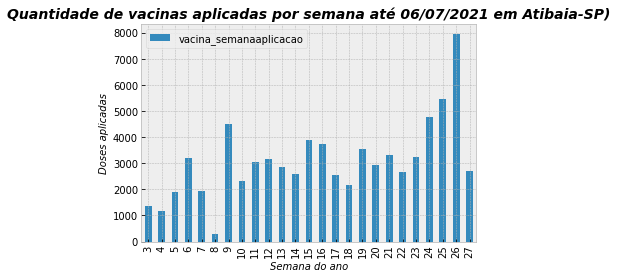

In [13]:
#Exibe o grafico de doses aplicadas de acordo com a semana do ano
df.groupby(['vacina_semanaaplicacao']).agg({'vacina_semanaaplicacao':'count'}).plot(kind='bar')
plt.style.use('bmh')
plt.title('Quantidade de vacinas aplicadas por semana até 06/07/2021 em Atibaia-SP)', fontsize=14, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Semana do ano', fontsize=10, fontstyle='italic', fontfamily='sans-serif')
plt.ylabel('Doses aplicadas', fontsize=10, fontstyle='italic', fontfamily='sans-serif')
plt.rcParams['figure.figsize'] = (20,18)
plt.show()


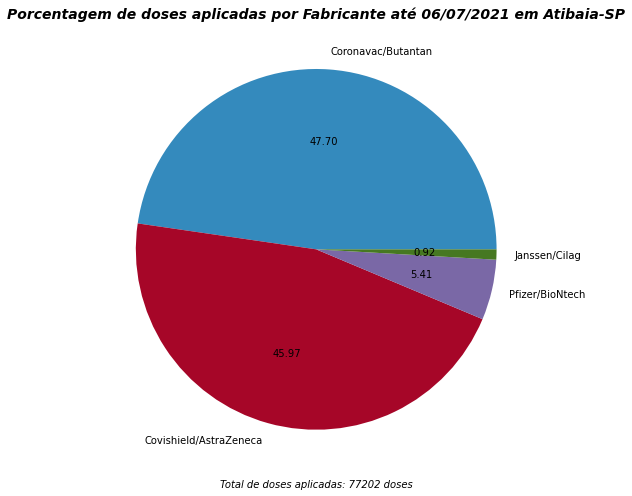

In [21]:
#Exibe a quantidade de vacinas aplicadas de acordo com o fabricante
df.vacina_nome.value_counts(normalize=True).plot(kind='pie', autopct='%.2f', figsize=(10,7))
plt.style.use('bmh')
plt.title('Porcentagem de doses aplicadas por Fabricante até 06/07/2021 em Atibaia-SP', fontsize=14, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.ylabel('')
plt.xlabel('Total de doses aplicadas: 77202 doses', fontsize=10, fontstyle='italic', fontfamily='sans-serif')
plt.tight_layout(w_pad=0.5, h_pad=0.5)

In [16]:
#Exibe a quantidade de vacinas aplicadas de acordo com o fabricante
df.vacina_nome.value_counts()

Coronavac/Butantan        36828
Covishield/AstraZeneca    35491
Pfizer/BioNtech            4176
Janssen/Cilag               707
Name: vacina_nome, dtype: int64

In [17]:
#Exibe a porcentagem de vacinados de acordo com o sexo
df.paciente_enumsexobiologico.value_counts(normalize=True)

F    0.593158
M    0.406842
Name: paciente_enumsexobiologico, dtype: float64

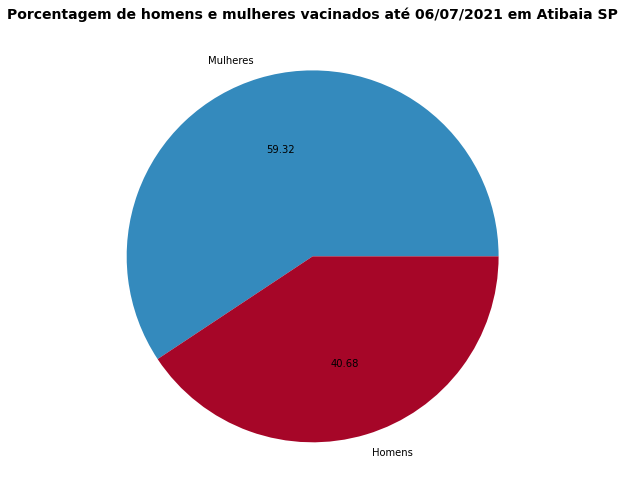

In [22]:
#Exibe a quantidade de vacinas aplicadas de acordo com o sexo
df.paciente_enumsexobiologico.value_counts(normalize=True).plot(kind='pie', autopct='%.2f', labels=['Mulheres','Homens'], figsize=(10,7))
plt.style.use('bmh')
plt.title('Porcentagem de homens e mulheres vacinados até 06/07/2021 em Atibaia SP', fontsize=14, fontweight='bold', fontfamily='sans-serif')
plt.ylabel('')
plt.tight_layout(w_pad=0.5, h_pad=0.5)

([<matplotlib.axis.YTick at 0x7f3dc7fbee50>,
 <a list of 22 Text major ticklabel objects>)

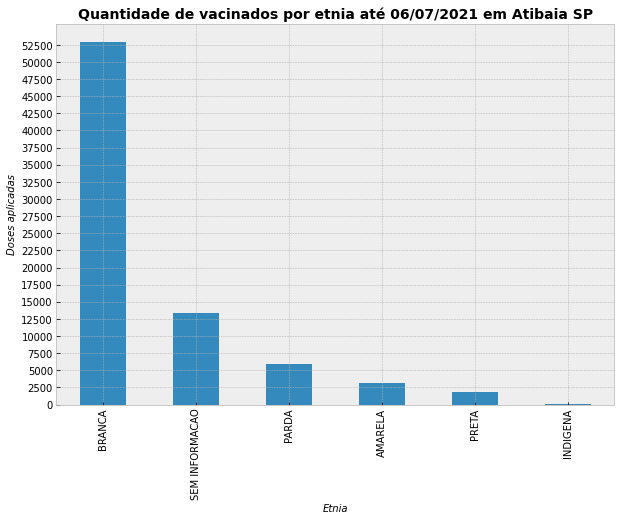

In [27]:
#Exibe a porcentagem de vacinados de acordo com o raça
df.paciente_racacor_valor.value_counts().plot(kind='bar', figsize=(10,7))
plt.style.use('bmh')
plt.title('Quantidade de vacinados por etnia até 06/07/2021 em Atibaia SP', fontsize=14, fontweight='bold', fontfamily='sans-serif')
plt.xlabel('Etnia', fontsize=10, fontstyle='italic', fontfamily='sans-serif')
plt.ylabel('Doses aplicadas', fontsize=10, fontstyle='italic', fontfamily='sans-serif')
bins = range(0,55000,2500)
plt.yticks(bins)

([<matplotlib.axis.YTick at 0x7f3dbdf0c690>,
 <a list of 45 Text major ticklabel objects>)

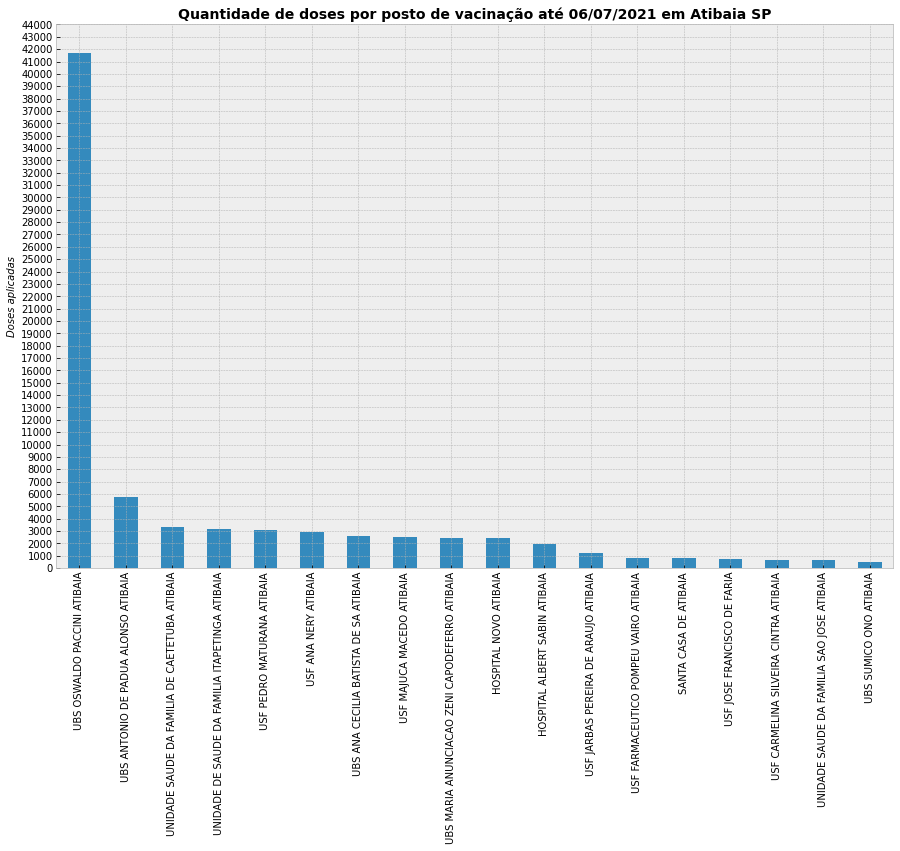

In [33]:
#Exibe a quantidade de vacinas aplicadas por localidade
df.estalecimento_nofantasia.value_counts().plot(kind='bar', figsize=(15,10))
plt.style.use('bmh')
plt.title('Quantidade de doses por posto de vacinação até 06/07/2021 em Atibaia SP', fontsize=14, fontweight='bold', fontfamily='sans-serif')
plt.ylabel('Doses aplicadas', fontsize=10, fontstyle='italic', fontfamily='sans-serif')
bins = range(0,45000,1000)
plt.yticks(bins)

In [ ]:
total = df.shape
total_doses = total[0]
print('O total de vacinas contra COVID-19 aplicadas em Atibaia até o dia 06/07/2021 é de: {} doses'.format(total_doses))

O total de vacinas contra COVID-19 aplicadas em Atibaia até o dia 06/07/2021 é de: 77202 doses


([<matplotlib.axis.XTick at 0x7f3dbe24f750>,
 <a list of 13 Text major ticklabel objects>)

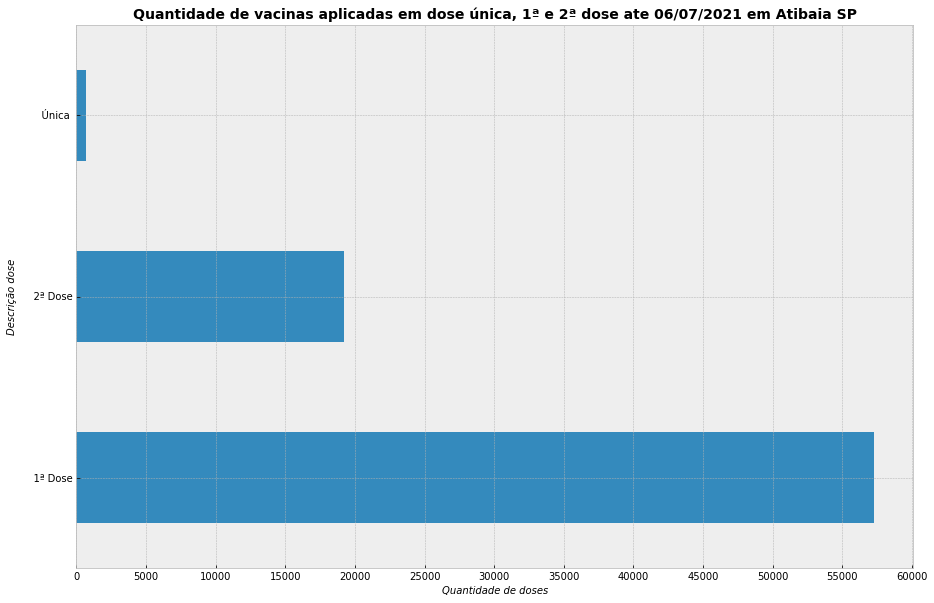

In [34]:
#Exibe a quantidade de vacinas aplicadas na primeira, segunda e dose unica
df.vacina_descricao_dose.value_counts().plot(kind='barh', figsize=(15,10))
plt.style.use('bmh')
plt.title('Quantidade de vacinas aplicadas em dose única, 1ª e 2ª dose ate 06/07/2021 em Atibaia SP', fontsize=14, fontweight='bold', fontfamily='sans-serif')
plt.xlabel('Quantidade de doses', fontsize=10, fontstyle='italic', fontfamily='sans-serif')
plt.ylabel('Descrição dose', fontsize=10, fontstyle='italic', fontfamily='sans-serif')
bins = range(0,65000,5000)
plt.xticks(bins)

In [ ]:
df1 = df.loc[df['paciente_datanascimento'] == '1964-03-10']

In [ ]:
df1[:2]

In [ ]:
df.vacina_grupoatendimento_nome.value_counts()